In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

In [21]:
layer_id = 0
expert_id = 0
weight_id = 3
out_dir = "./solutions/l{}_e{}_w{}".format(layer_id, expert_id, weight_id)

In [22]:
thresh = 2048

In [23]:
neuron_ids = []
diff_types = []
diff_values = []

current_neuron_id = 0
with open(os.path.join(out_dir, 'eval.csv'), "r") as f:
    _ = f.readline()
    for line in f:
        neuron_id, lambd, nonzeros, diff_norm, diff_element_wise = line.strip().split(',')
        neuron_id = int(neuron_id)
        nonzeros = int(nonzeros)
        diff_norm = float(diff_norm)
        diff_element_wise = float(diff_element_wise)
        if neuron_id != current_neuron_id:
            continue
        if nonzeros >= thresh:
            neuron_ids.append(neuron_id)
            diff_types.append('Norm')
            diff_values.append(diff_norm)
            neuron_ids.append(neuron_id)
            diff_types.append('Element-wise')
            diff_values.append(diff_element_wise)
            current_neuron_id += 1

In [24]:
df = pd.DataFrame({
    'Type': diff_types,
    'Error': diff_values
})

In [25]:
norm_df = df[df['Type'] == 'Norm']
element_wise_df = df[df['Type'] == 'Element-wise']

# sort
norm_df = norm_df.sort_values(by='Error', ascending=False).reset_index(drop=True)
norm_df["Index"] = norm_df.index
element_wise_df = element_wise_df.sort_values(by='Error', ascending=False).reset_index(drop=True)
element_wise_df["Index"] = element_wise_df.index

# concat
df = pd.concat([norm_df, element_wise_df]).reset_index(drop=True)

In [26]:
df

,Type,Error,Index
0,Norm,0.339604,0
1,Norm,0.338830,1
2,Norm,0.336654,2
3,Norm,0.334020,3
4,Norm,0.331581,4
...,...,...,...
28667,Element-wise,0.000709,14331
28668,Element-wise,0.000707,14332
28669,Element-wise,0.000700,14333
28670,Element-wise,0.000625,14334


Text(0.5, 1.0, 'Error Element-wise')

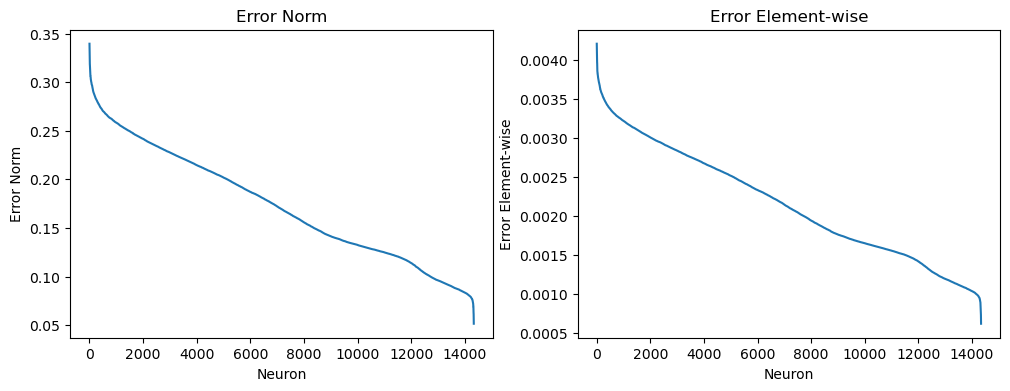

In [27]:
# plot
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.lineplot(data=df[df["Type"] == "Norm"], x="Index", y='Error', ax=ax[0])
ax[0].set_xlabel('Neuron')
ax[0].set_ylabel('Error Norm')
ax[0].set_title('Error Norm')
sns.lineplot(data=df[df["Type"] == "Element-wise"], x="Index", y='Error', ax=ax[1])
ax[1].set_xlabel('Neuron')
ax[1].set_ylabel('Error Element-wise')
ax[1].set_title('Error Element-wise')

In [28]:
fig.savefig(os.path.join(out_dir, 'error.pdf'), bbox_inches='tight')